In [24]:
#pip install scikit_optimize

time: 792 µs (started: 2021-11-08 04:14:46 +00:00)


In [25]:
#pip install ipython-autotime

time: 1.2 ms (started: 2021-11-08 04:14:46 +00:00)


In [26]:
#pip install -U memory_profiler
#pip install ipython-autotime
%load_ext autotime
#%load_ext memory_profiler

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.22 ms (started: 2021-11-08 04:14:46 +00:00)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence
from skopt import gp_minimize
from tensorflow import keras
import pickle 

time: 1.83 ms (started: 2021-11-08 04:14:46 +00:00)


In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
time: 1.5 s (started: 2021-11-08 04:14:46 +00:00)


In [29]:
cd /content/gdrive/MyDrive/Colab Notebooks/Genetic

/content/gdrive/MyDrive/Colab Notebooks/Genetic
time: 5.05 ms (started: 2021-11-08 04:14:47 +00:00)


In [30]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./my_model",compile=False)

#load scaler
with open("my_scaler_x.pkl","rb") as f:
    loaded_scaler_x= pickle.load(f)

with open("my_scaler_y.pkl","rb") as f:
    loaded_scaler_y= pickle.load(f)

time: 726 ms (started: 2021-11-08 04:14:47 +00:00)


In [31]:
def f( arr ):
    arr = np.array(arr)
    arr=arr[np.newaxis,:]
    X_scaled= loaded_scaler_x.transform(arr)    
    predicted_y= loaded_scaler_y.inverse_transform(reconstructed_model.predict(X_scaled))
    
    return predicted_y[0,0]

time: 4.35 ms (started: 2021-11-08 04:14:48 +00:00)


In [41]:
res = gp_minimize(f,                  # the function to minimize
                  [(10, 25),(25,45),(3.5,5.5),(1,7),(0.2,0.7),(23,26),(2,15),(10,30)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=100,         # the number of evaluations of f
                  n_random_starts=8,  # the number of random initialization points
                  noise=0,       # the noise level (optional)
                  random_state=1234)   # the random seed

time: 1min 31s (started: 2021-11-08 04:29:25 +00:00)


Text(0.5, 1.0, 'Energy Minimization with Bayesian Optimization')

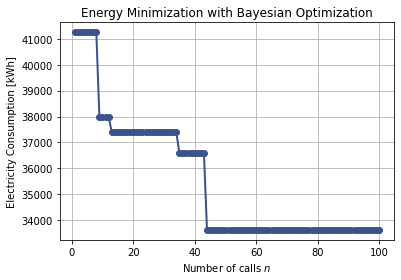

time: 283 ms (started: 2021-11-08 04:30:56 +00:00)


In [43]:
plot_convergence(res)
plt.ylabel('Electricity Consumption [kWh]')
plt.title('Energy Minimization with Bayesian Optimization')

In [47]:
res.fun

33616.176

time: 5.09 ms (started: 2021-11-08 04:39:49 +00:00)


In [48]:
res.x

[14, 33, 3.9691636940801645, 6, 0.6774806698944386, 24, 7, 13]

time: 6.75 ms (started: 2021-11-08 04:39:50 +00:00)
